## Import

In [1]:
import pandas as pd
# from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
from time import strptime
import datetime
from datetime import datetime
# import plotly.express as px
# import matplotlib.mlab as mlab
# from statistics import mean
# import pylab
import math
import warnings
warnings.filterwarnings('ignore')
import time
import csv
import glob
import logging
import importlib
import tweets_utils
import json
%autosave 3600

Autosaving every 3600 seconds


## Indice
- [Utils](#utils)
- [Profiles](#profiles)
- [CCDH and tweets process](#ccdh)
    - [Process CCDH data](#Process_CCDH_data)
    - [CCDH and Total tweets comparison](#comparison)
    - [Total stats](#stats) 
    - [Stats disinform](#stats_disinform)

## Utils
<a id="utils"/>

In [2]:
def stats(total_len, original_len, retweet_len, reply_len):
    print(f'Number of total tweets: {total_len}')
    print(f'Number of original tweets: {original_len}')
    print(f'Number of retweet: {retweet_len}')
    print(f'Number of reply: {reply_len}')

    perc_original = np.around(original_len*100/total_len,2)
    perc_retweet = np.around(retweet_len*100/total_len,2)
    perc_reply = np.around(reply_len*100/total_len,2)
    print(f'Number of original_tweets: {perc_original}% of total tweets')
    print(f'Number of retweets: {perc_retweet}% of total tweets')
    print(f'Number of replies: {perc_reply}% of total tweets')

    print('Check sum == len(tweets): ',original_len + retweet_len + reply_len == total_len)

In [13]:
users_link = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/users_ccdh.csv")
users_disinform = pd.read_csv(users_link[0])
users_disinform

,screen_name,status
0,mercola,active
1,RobertKennedyJr,active
2,BusyDrT,suspended
3,DrButtar,active
4,unhealthytruth,active
5,DrChrisNorthrup,active
6,DrBenTapper1,suspended
7,kevdjenkins1,active


In [14]:
def found(name, list_name=users_disinform["screen_name"]):
    for i in list_name:
        if(name == i):
            return True
    return False

In [24]:
def print_pie_chart3(title, name1, name2, name3, len1, len2, len3):
    label = [name1, name2, name3]
    data = [len1, len2, len3]
    explode = (0.1, 0.1, 0.1)

    # Creating color parameters
    colors = ( "lightgreen", "orange", "cyan")

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "black" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data, 
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode, 
                                      labels = label,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp)

    # Adding legend
    ax.legend(wedges, label,
              title ="Legend",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(title)
    plt.show()

## Profiles
<a id="profiles"/>

In [2]:
# from platform import python_version
# print(python_version())

In [3]:
files = glob.glob("F:/COVID-19-Tweets/*/users.csv")
files

['F:/COVID-19-Tweets\\2020-01\\users.csv',
 'F:/COVID-19-Tweets\\2020-02\\users.csv',
 'F:/COVID-19-Tweets\\2020-03\\users.csv',
 'F:/COVID-19-Tweets\\2020-04\\users.csv',
 'F:/COVID-19-Tweets\\2020-05\\users.csv']

In [4]:
for chunk in pd.read_csv(files[0], chunksize=10, lineterminator = '\n'):
    break
# chunk.head()

In [5]:
chunksize = int(1e6)
flag = False
profile_n = 0
i = 0
profile_id = []
profile_name = []
# profile_loc = []
# profile_verified = []
# profile_creation = []
# default_profile_image = []
# statuses_count = []

users = []

# workers = 2
cols = [u'id', u'screen_name', u'location', u'created_at', u'verified', u'statuses_count', u'default_profile_image'] 
cont = 1

In [6]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols, flag, None))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        profile_name.extend(lista[i]["users"])
        profile_id.extend(lista[i]["ids"])
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\users.csv
Processing chunk 1
Processing chunk 2
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\users.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\users.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\users.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Mese numero 4
Reading file: F:/COVID-19-Tweets\2020-05\users.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Mese numero 5
Time:  175.24603620000002


In [7]:
del result
del lista
del chunk
profile_name = pd.Series(profile_name)

## CCDH Research
<a id="ccdh"/>

### Process CCDH data
<a id="Process_CCDH_data"/>

In [5]:
disinform = pd.read_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/disinformation_users.csv")
disinform

,screen_name,status
0,mercola,active
1,RobertKennedyJr,active
2,TyCharleneB,removed
3,BusyDrT,suspended
4,IslamRizza,removed
5,DrButtar,active
6,unhealthytruth,active
7,sayerjigmi,active
8,KellyBroganMD,active
9,DrChrisNorthrup,active


In [13]:
names = []
status = []
for i in range(len(disinform["screen_name"])):
    print(disinform["screen_name"][i])
    if(disinform["screen_name"][i] in profile_name.values):
        names.append(disinform["screen_name"][i])
        status.append(disinform["status"][i])
print(names)
print(status)

mercola
RobertKennedyJr
TyCharleneB
BusyDrT
IslamRizza
DrButtar
unhealthytruth
sayerjigmi
KellyBroganMD
DrChrisNorthrup
DrBenTapper1
kevdjenkins1
['mercola', 'RobertKennedyJr', 'BusyDrT', 'DrButtar', 'unhealthytruth', 'DrChrisNorthrup', 'DrBenTapper1', 'kevdjenkins1']
['active', 'active', 'suspended', 'active', 'active', 'active', 'suspended', 'active']


In [14]:
with open("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/users_ccdh.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["screen_name","status"])
    for i in range(len(names)):
        writer.writerow([names[i], status[i]])

### CCDH and Total tweets comparison
<a id="comparison"/>

In [33]:
retweet_name = []
retweet_id = []
retweeted_name = []
retweeted_id = []
rt_link = []

tweet_name = []
tweet_id = []

reply_id = []
reply_name = []
replied_id = []
replied_name = []

link = []
result = []

total_len = 0
original_len = 0
retweet_len = 0
reply_len = 0
d_total_len = 0
d_original_len = 0
d_retweet_len = 0
d_reply_len = 0

cols_tweets = [u'user_screen_name',u'user_id', u'created_at', 
               u'urls', u"rt_created_at", u"rt_user_id", 
               u"rt_user_screen_name", u'in_reply_to_user_id', 
               u'in_reply_to_screen_name', u'in_reply_to_status_id']

files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [34]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, users_disinform["screen_name"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
#     x = 0
#     y = 0
    for i in range(len(lista)):
        #original post
        tweet_name.extend(lista[i]["original_names"])
        tweet_id.extend(lista[i]["original_ids"])
        link.extend(lista[i]["links"])
#         #user who retweet
        retweet_name.extend(lista[i]["retweet_users"])
        retweet_id.extend(lista[i]["retweet_ids"])
#         #user retweeted
        retweeted_name.extend(lista[i]["retweeted_users"])
        retweeted_id.extend(lista[i]["retweeted_ids"])
        rt_link.extend(lista[i]["rt_link"])
#         #user who reply
        reply_id.extend(lista[i]["reply_ids"])
        reply_name.extend(lista[i]["reply_users"])
#         #use who get reply
        replied_id.extend(lista[i]["replied_ids"])
        replied_name.extend(lista[i]["replied_users"])
#         #len
        total_len = total_len + lista[i]["total_len"]
        original_len = original_len + lista[i]["original_len"]
        retweet_len = retweet_len + lista[i]["retweet_len"]
        reply_len = reply_len + lista[i]["reply_len"]
        
        d_total_len = d_total_len + lista[i]["d_total_len"]
        d_original_len = d_original_len + lista[i]["d_original_len"]
        d_retweet_len = d_retweet_len + lista[i]["d_retweet_len"]
        d_reply_len = d_reply_len + lista[i]["d_reply_len"]
#         print(i)
#         print("-")
#         if(i == 0):
#             x = 0
#         else:
#             x = y
#         y = x + len(lista[i]["users"])
#         for q in range(x,y):
#             if(found(lista[i]["users"][q])):          
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [51]:
del result
del lista

### Total stats 
<a id="stats"/>

In [35]:
stats(total_len, original_len, retweet_len, reply_len)

Number of total tweets: 66412411
Number of original tweets: 13999715
Number of retweet: 48312504
Number of reply: 4100192
Number of original_tweets: 21.08% of total tweets
Number of retweets: 72.75% of total tweets
Number of replies: 6.17% of total tweets
Check sum == len(tweets):  True


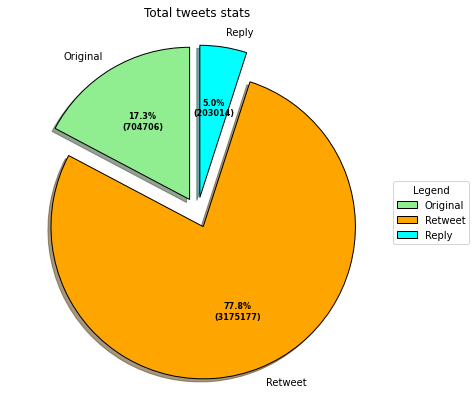

In [26]:
print_pie_chart3("Total tweets stats","Original","Retweet", "Reply", original_len, retweet_len, reply_len)

### Stats disinform
<a id="stats_disinform"/>

In [36]:
stats(d_total_len, d_original_len, d_retweet_len, d_reply_len)

Number of total tweets: 3766
Number of original tweets: 75
Number of retweet: 3513
Number of reply: 178
Number of original_tweets: 1.99% of total tweets
Number of retweets: 93.28% of total tweets
Number of replies: 4.73% of total tweets
Check sum == len(tweets):  True


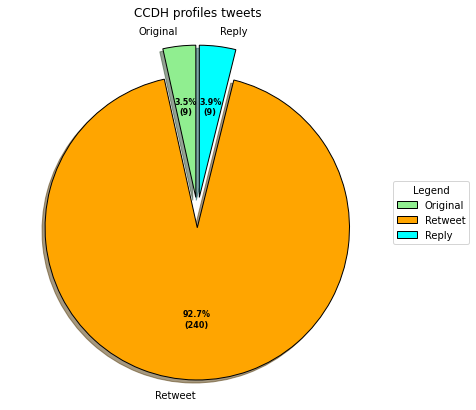

In [32]:
print_pie_chart3("CCDH profiles tweets","Original","Retweet", "Reply", d_original_len, d_retweet_len, d_reply_len)

In [102]:
urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in link]
date = [tweets_utils.process_datetime(v) for v in data]

### Misc investigation

In [66]:
retweeted_name = pd.Series(retweeted_name).value_counts()

In [71]:
# tweet_name
# tweet_id
# retweet_name
# retweet_id
# retweeted_name
# retweeted_id
# reply_id
# reply_name
# replied_id
# replied_name

BusyDrT            41
unhealthytruth     12
mercola             7
RobertKennedyJr     6
kevdjenkins1        3
DrChrisNorthrup     3
DrButtar            2
DrBenTapper1        1
dtype: int64

### Botometer Score

In [ ]:
import botometer
from data_config import rapidapi_key_conf, consumer_key_conf, consumer_secret_conf, access_token_conf, access_token_secret_conf

rapidapi_key = rapidapi_key_conf
twitter_app_auth = {
    'consumer_key': consumer_key_conf,
    'consumer_secret': consumer_secret_conf,
    'access_token': access_token_conf,
    'access_token_secret': access_token_secret_conf,
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

# Check a single account by screen name
result = bom.check_account('@elonmusk')
result